In [1]:
import datacube
from deafrica_conflux.hopper import find_datasets

In [2]:
# Connect to datacube.
dc = datacube.Datacube(app='test')

In [3]:
datasets = find_datasets(query={}, products=["wofs_ls"], dc=dc)
dss = list(datasets)

In [4]:
len(dss)

24

In [9]:
[ds.id for ds in dss]

[UUID('6d1d62de-5edd-5892-9dcc-9e1616251411'),
 UUID('5a88e4ab-35b0-5aed-968a-4dbeedd33dcf'),
 UUID('f87f1f7a-3789-5700-81dd-f19e7e62e8d4'),
 UUID('cee673dc-4432-54be-9ad7-8ee23ff3577e'),
 UUID('fe8b94b2-a33c-5894-a7c0-55ee06299114'),
 UUID('3d728ebf-45d3-59c1-a75e-a3dd6e7c6905'),
 UUID('1ddca206-0bd9-5e8e-8e71-71ca90be5567'),
 UUID('b1624ab7-68d8-5982-b630-a43ee5f441b8'),
 UUID('effd8637-1cd0-585b-84b4-b739e8626544'),
 UUID('85672a04-165d-547d-bc6d-cd361c9f47eb'),
 UUID('73765034-e87a-5b99-9184-7a70499ff2b4'),
 UUID('679bd9b7-f88b-5996-bb39-43a87cbe916a'),
 UUID('424bae19-35ac-5174-a40a-743450f86727'),
 UUID('790dec44-1de9-5167-bd22-4f72796a6e95'),
 UUID('d15407ff-3fe5-55ec-a713-d4cc9399e6b3'),
 UUID('3a736326-bb16-5112-a38e-8861b448cc8c'),
 UUID('c2ca91b7-1f55-5662-9e5d-3b1396af10f1'),
 UUID('899b91f1-62f9-508c-a10b-96c31a9bd85e'),
 UUID('e3a7c52a-696b-5b0b-aaaf-b7b2ce4792db'),
 UUID('d5bedf0d-29f0-5ac7-8c9d-0b72353f66e4'),
 UUID('95415dba-62dc-5c08-b3ec-79395ddda236'),
 UUID('9ffa25

/tmp/ipykernel_28315/3615893072.py:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots()


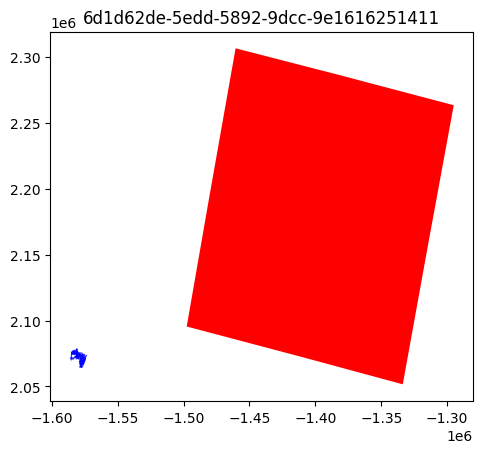

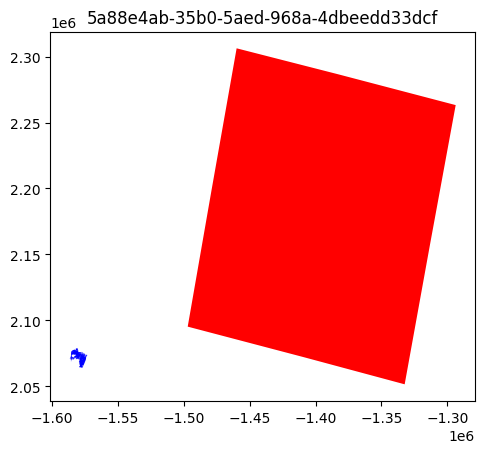

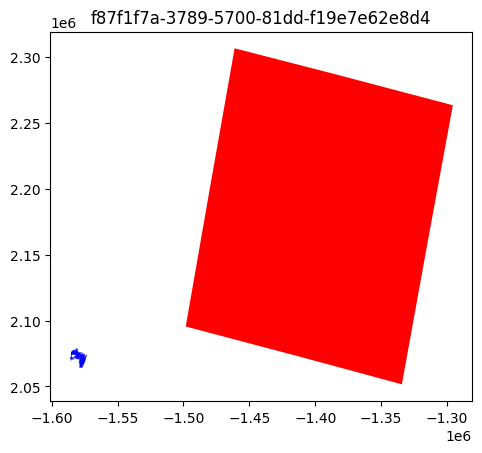

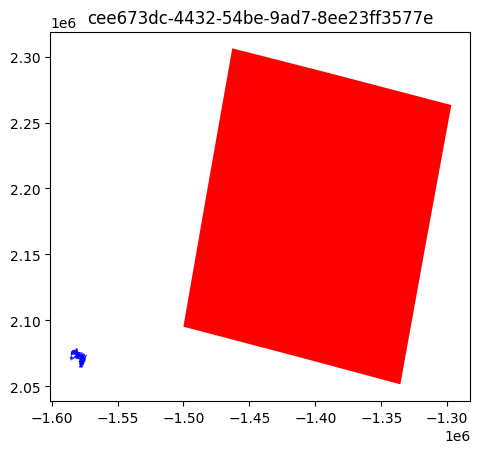

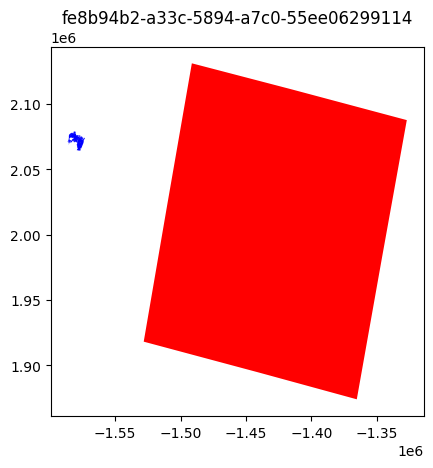

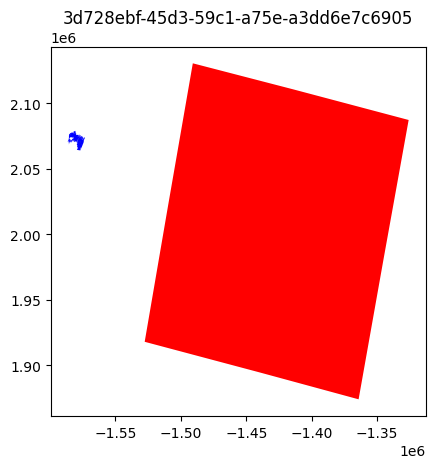

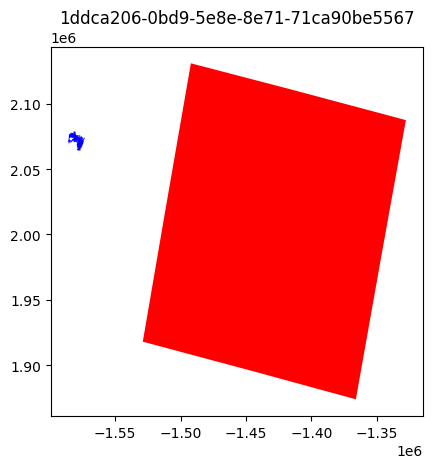

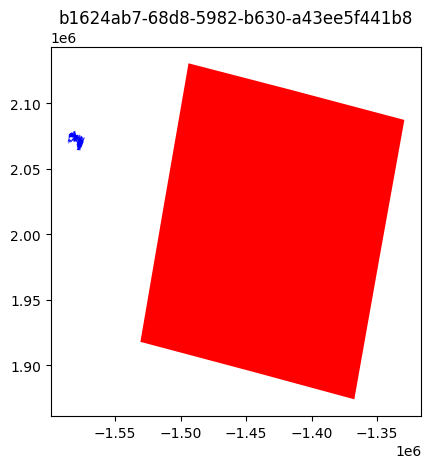

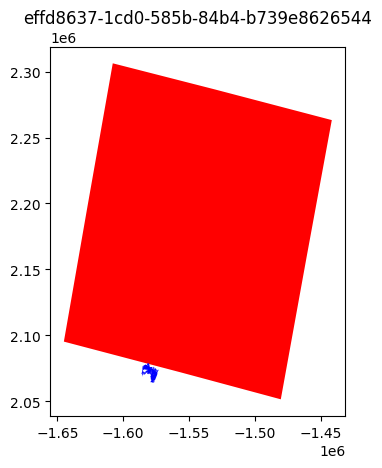

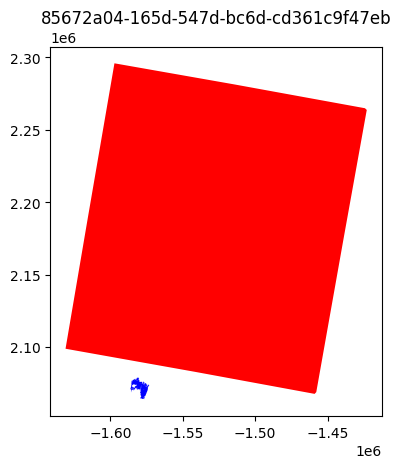

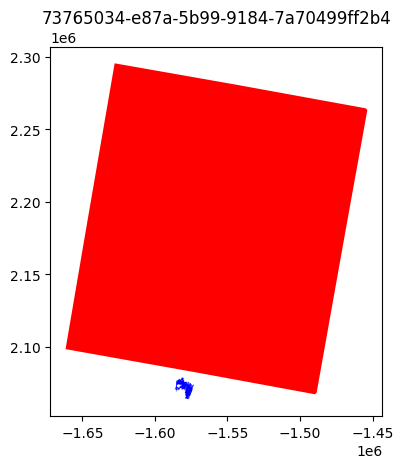

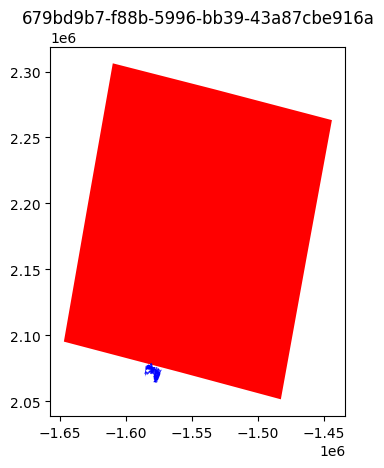

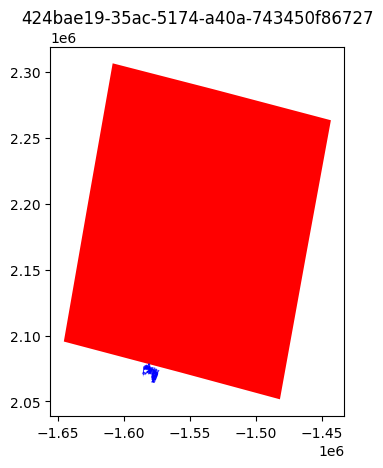

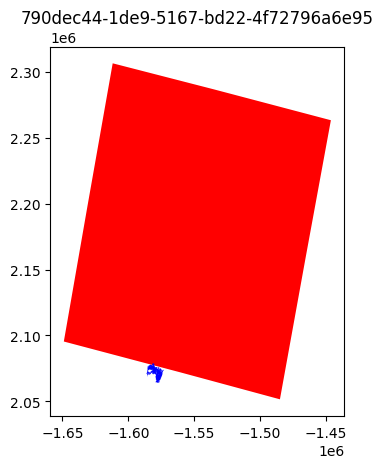

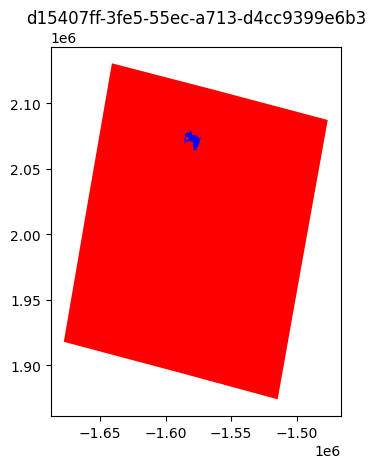

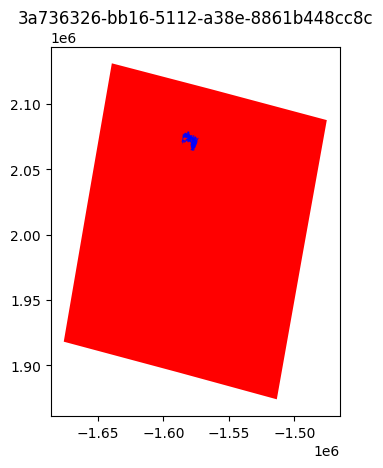

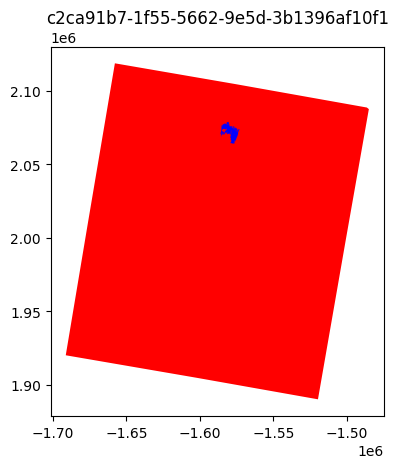

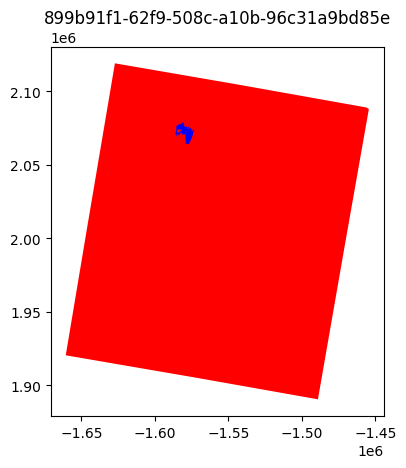

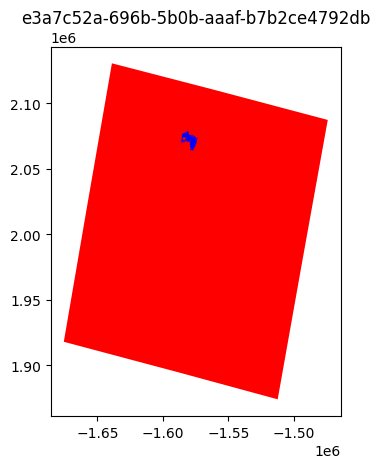

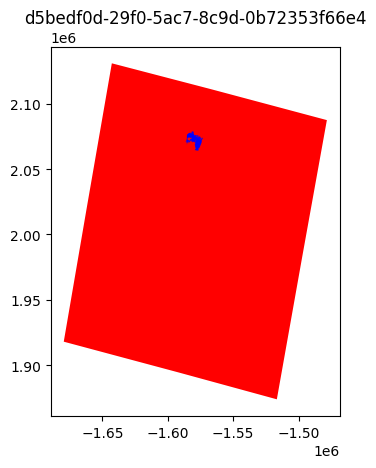

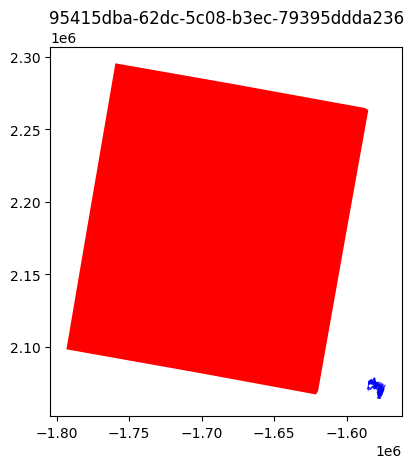

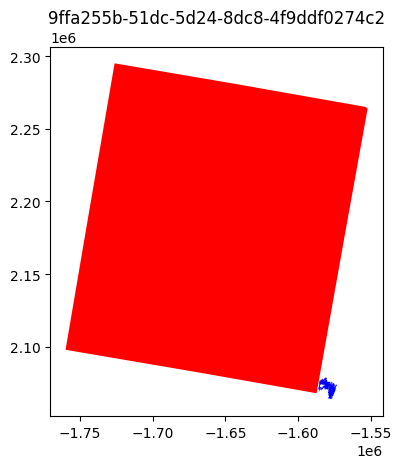

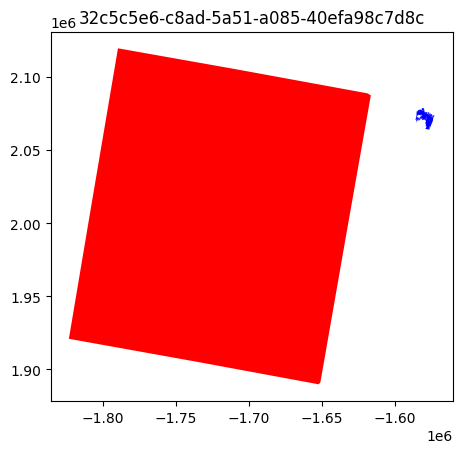

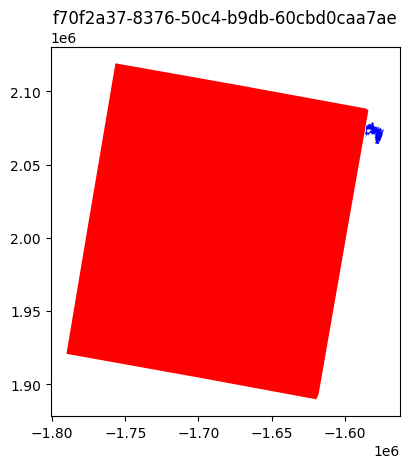

In [7]:
from deafrica_conflux.id_field import guess_id_field
import geopandas as gpd
#polygons_gdf = gpd.read_file("data/edvntx0mu.geojson")
polygons_gdf = gpd.read_file("data/edumesbb2.geojson")
id_field = guess_id_field(polygons_gdf, "UID")
polygons_gdf.set_index(id_field, inplace=True)
polygons_gdf = polygons_gdf.to_crs("EPSG:6933")

for ds in dss:
    ds_extent = ds.extent.to_crs(polygons_gdf.crs)
    import matplotlib.pyplot as plt
    fig, ax = plt.subplots()
    ds_extent_gdf = gpd.GeoDataFrame(geometry=[ds_extent.geom], crs=ds_extent.crs)
    ds_extent_gdf.plot(color="red", ax=ax)
    polygons_gdf.plot(color="blue", ax=ax)
    ax.set_title(ds.id)

/tmp/ipykernel_21302/309817181.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  polygons_gdf.geometry.intersects(ds_extent.geom)[0]


False

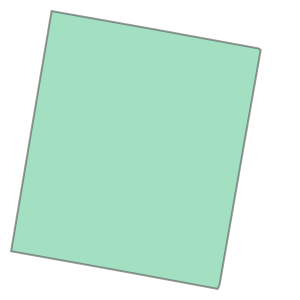